In [1]:
import src.util as util
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def calc_loss(X, Y, theta):
    # Note: loss function for 1, -1 as label
    m = len(Y)
    J = (1/m) * np.sum(np.log(1 + np.exp(-Y * np.dot(X, theta))))
    return J


# Important note: you do not have to modify this file for your homework.
def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad

        if i % 10000 == 0:
            print('Finished %d iterations' % i)
            loss = calc_loss(X, Y, prev_theta)
            print(f"Loss value: {loss}")
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
        if i == 40000: break

    return


def main():
    print('==== Training model on data set A ====')
    Xa, Ya = util.load_csv('./data/ds1_a.csv', add_intercept=True)
    logistic_regression(Xa, Ya)

    print('\n==== Training model on data set B ====')
    Xb, Yb = util.load_csv('./data/ds1_b.csv', add_intercept=True)
    logistic_regression(Xb, Yb)

main()

==== Training model on data set A ====
Finished 10000 iterations
Loss value: 0.15988748221132873
Finished 20000 iterations
Loss value: 0.15988748218387222
Finished 30000 iterations
Loss value: 0.15988748218387222
Converged in 30380 iterations

==== Training model on data set B ====
Finished 10000 iterations
Loss value: 0.03045205187147263
Finished 20000 iterations
Loss value: 0.02325614290178619
Finished 30000 iterations
Loss value: 0.019655531482405612
Finished 40000 iterations
Loss value: 0.017379900838977586


## (a) : try the two models

The model B will have infinate iterations.


------

## (b) find the problem

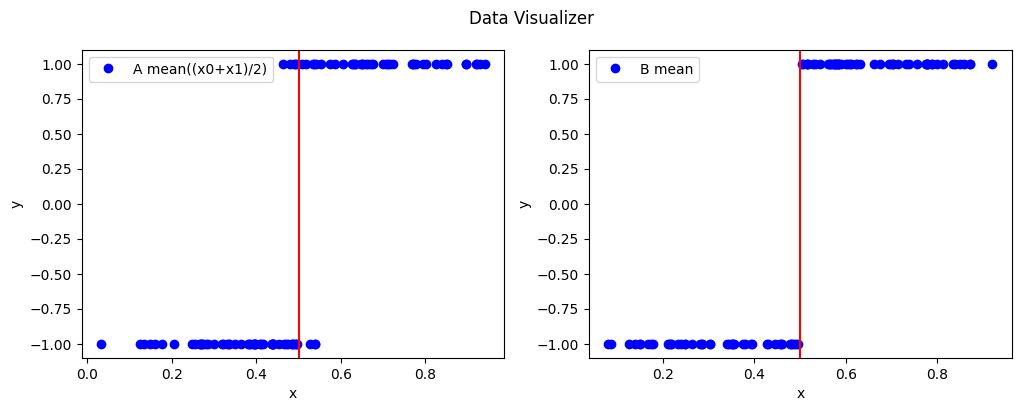

In [3]:
def data_visualizer(a_path, b_path):
    # visual explore what the data set difference, since both are using the same model(code)
    Xa, Ya = util.load_csv(a_path, add_intercept=True)
    Xb, Yb = util.load_csv(b_path, add_intercept=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    fig.suptitle('Data Visualizer')

    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.plot(np.mean(Xa[:,1:],axis=1), Ya, 'bo', label="A mean((x0+x1)/2)")
    ax1.legend()

    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.plot(np.mean(Xb[:, 1:], axis=1), Yb, 'bo', label="B mean")
    ax2.legend()

    # draw vertical line at x=0.5
    ax1.axvline(x=0.5, color='red')
    ax2.axvline(x=0.5, color='red')
    plt.show()

data_visualizer("./data/ds1_a.csv","./data/ds1_b.csv")

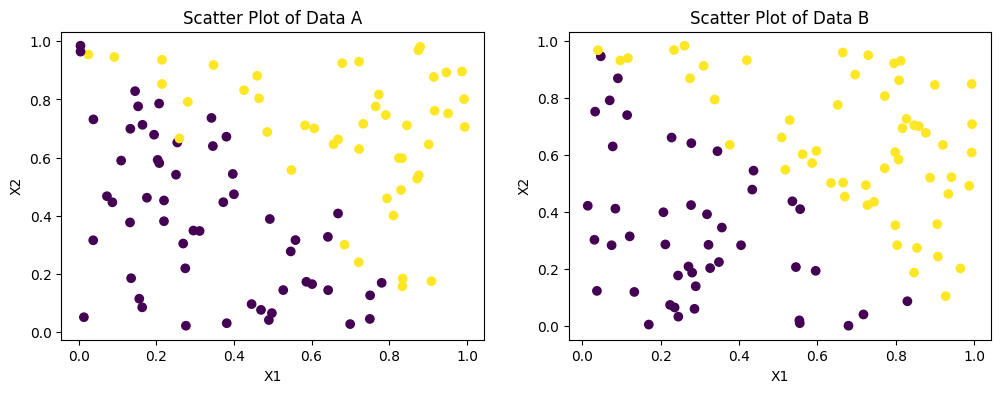

In [4]:
def plot_scatter_subplots(path_a, path_b):
    # Load data from the specified file paths
    X_a, y_a = util.load_csv(path_a, add_intercept=True)
    X_b, y_b = util.load_csv(path_b, add_intercept=True)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Create a scatter plot of the first dataset on the first subplot
    ax1.scatter(X_a[:, 1], X_a[:, 2], c=y_a)
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_title('Scatter Plot of Data A')

    # Create a scatter plot of the second dataset on the second subplot
    ax2.scatter(X_b[:, 1], X_b[:, 2], c=y_b)
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_title('Scatter Plot of Data B')

    # Show the plot
    plt.show()

# Example usage
plot_scatter_subplots("./data/ds1_a.csv", "./data/ds1_b.csv")


### Observation for the plot and data

From the data visualization, it seems that there are a bit overlap of data points around the decision boundry from data set `a`. 

### Observation for the model outcome

Looks like the dataset B already boundry seperated clearly. And optimal theta already been find around 100 iterations.

### Reasons

Because the label is (-1, 1), then the loss function :

The cost function for logistic regression is typically given by:

$$J(\theta) = -\frac{1}{m} \sum^m_{i=1} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))]$$

The given loss function is the cross-entropy loss function for binary classification problems, where $h_\theta(x^{(i)})$ is the predicted probability that $y^{(i)} = 1$ given $x^{(i)}$ and parameterized by $\theta$. 

When $y^{(i)} = 1$ or $-1$, we can rewrite $h_\theta(x^{(i)})$ as $h_\theta(x^{(i)}) = \frac{1}{1 + \exp(-\theta^T x^{(i)})}$ if $y^{(i)} = 1$ and $h_\theta(x^{(i)}) = \frac{1}{1 + \exp(\theta^T x^{(i)})}$ if $y^{(i)} = -1$. 

Substituting these into the loss function, we get:

For $y^{(i)} = 1$:
$$J(\theta) = -\frac{1}{m} \sum^m_{i=1} [\log(\frac{1}{1 + \exp(-\theta^T x^{(i)})}) + \log(1 - \frac{1}{1 + \exp(-\theta^T x^{(i)})})]$$

For $y^{(i)} = -1$:
$$J(\theta) = -\frac{1}{m} \sum^m_{i=1} [\log(\frac{1}{1 + \exp(\theta^T x^{(i)})}) + \log(1 - \frac{1}{1 + \exp(\theta^T x^{(i)})})]$$

Simplifying these expressions, we get:

For $y^{(i)} = 1$:
$$J(\theta) = \frac{1}{m} \sum^m_{i=1} \log(1 + \exp(-\theta^T x^{(i)}))$$

For $y^{(i)} = -1$:
$$J(\theta) = \frac{1}{m} \sum^m_{i=1} \log(1 + \exp(\theta^T x^{(i)}))$$

But we can combine these two cases into one by multiplying $y^{(i)}$ and $\theta^T x^{(i)}$ inside the exponential function, which gives us the final form:

$$J(\theta) = \frac{1}{m} \sum^m_{i=1} \log(1 + \exp(-y^{(i)} \theta^T x^{(i)}))$$


When loss of dataset `b` already reach very close to 0, loss of dataset `a` still the same. Because dataset `a` is not linearly seperable dataset, then $\theta^T x$ could be anything and it's not guaranteed that $y\theta^T x > 0$ for all data points, but dataset `b` is. Thus $\theta$ of model for dataset `b` will not be change much and $\Delta$ won't reduce to `1e-15`(because not must grad need to be made). 


### Note

__*__ In a binary classification problem, we often use a linear classifier to separate the data into two classes. The decision boundary of a linear classifier is a hyperplane defined by $\theta^T x = 0$, where $\theta$ is the parameter vector and $x$ is the input vector.

If a dataset is linearly separable, it means that there exists a hyperplane that can perfectly separate the two classes. Let's denote the two classes as $y = 1$ and $y = -1$.

For any data point $x$ in the class $y = 1$, we have $\theta^T x > 0$. This is because the data point is on the side of the hyperplane where $\theta^T x > 0$.

Similarly, for any data point $x$ in the class $y = -1$, we have $\theta^T x < 0$. This is because the data point is on the side of the hyperplane where $\theta^T x < 0$.

Therefore, for any data point $x$, if it belongs to the class $y = 1$, then $y\theta^T x = 1 \cdot \theta^T x > 0$. If it belongs to the class $y = -1$, then $y\theta^T x = -1 \cdot \theta^T x < 0$.

In conclusion, when a dataset is linearly separable, we have $y\theta^T x > 0$ for all data points. This is because the sign of $y\theta^T x$ indicates the class of the data point.

<br>

__*__ In the case of logistic regression, the loss function (also known as the cost function) is __convex__, which means that it has a single global minimum and no local minima. It is guaranteed to converge to the global minimum of the loss function. 



---

## (c) 

i. No. change learning rate wont solve linear seperable problem.

ii. Yes. iterate more is just a hack to make it fake condition.

iii. No. wont solve linear seperable problem.

iv. Yes. Could decrease theta.

v. Yes. It could make dataset seperable.


------

## (d)

No. 
